In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("covtype.csv")
df.head(4)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2


In [3]:
df.info()
df['Cover_Type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [4]:
x = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [5]:
scalar= StandardScaler()
x_scaled = scalar.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=42, stratify=y)
x_train.shape, x_test.shape

((290506, 54), (290506, 54))

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [8]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           1       0.96      0.93      0.94    105920\n           2       0.94      0.97      0.95    141651\n           3       0.93      0.95      0.94     17877\n           4       0.89      0.83      0.86      1373\n           5       0.93      0.71      0.81      4747\n           6       0.92      0.87      0.89      8683\n           7       0.97      0.94      0.95     10255\n\n    accuracy                           0.94    290506\n   macro avg       0.93      0.89      0.91    290506\nweighted avg       0.94      0.94      0.94    290506\n'

In [9]:
impotances = rf.feature_importances_
indices = np.argsort(impotances)[::-1][:15]

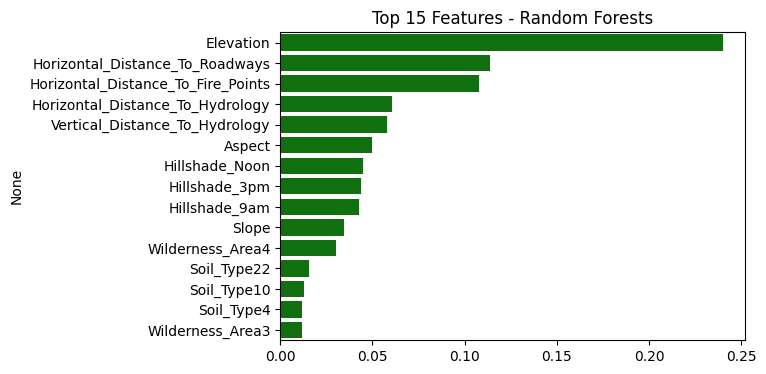

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x=impotances[indices], y=x.columns[indices], color='green')
plt.title('Top 15 Features - Random Forests')
plt.show()

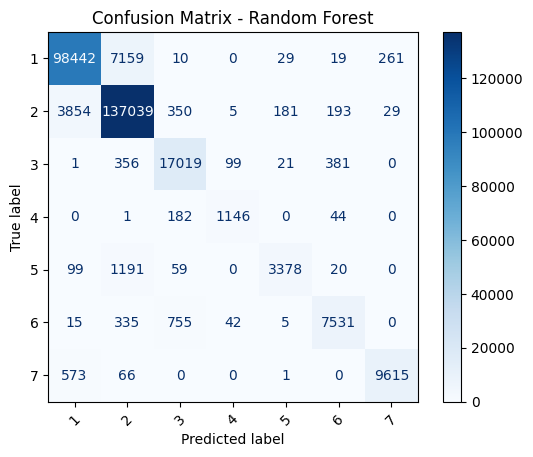

In [11]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [12]:
# import numpy as np

# Shift labels to start from 0
y_train_fixed = np.array(y_train) - 1
y_test_fixed = np.array(y_test) - 1

# Train again
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(x_train, y_train_fixed)
y_pred_xgb = xgb.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_fixed, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93    105920
           1       0.93      0.96      0.94    141651
           2       0.94      0.95      0.94     17877
           3       0.90      0.85      0.88      1373
           4       0.93      0.76      0.84      4747
           5       0.91      0.90      0.90      8683
           6       0.97      0.95      0.96     10255

    accuracy                           0.93    290506
   macro avg       0.93      0.90      0.91    290506
weighted avg       0.94      0.93      0.93    290506



In [13]:
from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(y_test, y_pred_rf)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f'{rf_acc:.3f}')
print(f'{xgb_acc:.3f}')

0.944
0.032


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,200], 'max_depth':[10,20], 'min_samples_split':[2,5]}
grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

grid.best_params_
grid.best_score_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


0.8799611765271272